<a href="https://colab.research.google.com/github/afujii/class/blob/main/DataFrameFromExcell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive Mount
At first, get used to Google Drive.  You place your exel .xslx file in a Folder in google drive.  In order to use the file, you have to mount the folder to Google Colab environment.  This process is done by the following command.
You need long ID, get from GD(Google Drive) and put it to GC(Google Colab).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


If you get the above message, mount is completed.

## openpyxl Library
From Excell file, data load into python environment.

In [ ]:
!pip install openpyxl
import openpyxl
import pprint

In [ ]:
wb = openpyxl.load_workbook('/content/drive/My Drive/IIST/Turbine Dashboard 17 february 2021.xlsx', data_only = True)
print(type(wb))
print(wb.sheetnames)

<class 'openpyxl.workbook.workbook.Workbook'>
['$U_P_D_A', '$PGIM_CONFI', 'Rawdata U1', 'Unit 1 ACC', 'Turbine Centerline', 'Condensate system', 'Unit 1', 'RawData U2', 'Unit 2']


Since in the Excell file, data items are calculated by excell function, so 'data_only = True' indicate that we only neet figures not functions.

In [ ]:
sheet = wb['Unit 1']
print(type(sheet))
row = [cell.value for cell in sheet['A10:AA10'][0]]
print(row)

<class 'openpyxl.worksheet.worksheet.Worksheet'>
['Main  Steam Flow', 'kg/s', 401.0222473, 381.2814331, 371.3746948, 371.6958923, 375.4319763, 391.5594177, 423.7453613, 424.1160889, 425.3084717, 420.5214233, 420.3430176, 425.6522522, 423.7569885, 420.3902588, 417.0046082, 422.3477783, 425.2323608, 425.6056213, 419.4929504, 426.4781494, 426.485199, 424.2385254, 421.6734009, 422.4118347, 421.8831482]


## Pandas
Pandas is data framework for statistical treatments.  The follwoing are the simple example of usage.  It comes with matplotlib/seaborn library for result visualizations.

In [ ]:
import pandas as pd
ds = pd.Series({'name':row[0],'unit':row[1],'data':row[2:]})

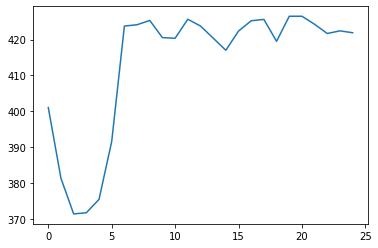

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ds.data)

In [ ]:
def get_value_list(t_2d):
    return([[cell.value for cell in row] for row in t_2d])

In [ ]:
l_2d = get_value_list(sheet['A10:AA26'])
#pprint.pprint(l_2d, width=40)
data = pd.DataFrame(l_2d)


In [ ]:
data[0]



0                         Main  Steam Flow
1                    Main Control Valve 1 
2                     Main Control Valve 2
3           Average Main Steam Temperature
4               HP Turbine Relative Stress
5         Main Steam Temperature Set Point
6              Average Main Steam Pressure
7            Main Steam Pressure Set Point
8                Intercept Control Valve 1
9                Intercept Control Valve 2
10      Average Reheater Steam Temperature
11              IP Turbine Relative Stress
12    Reheater Steam Temperature Set Point
13         Average Reheater Steam Pressure
14    Reheater Steam Temperature Set Point
15                            LP Bypass 11
16                            LP Bypass 12
Name: 0, dtype: object

<class 'pandas.core.series.Series'>


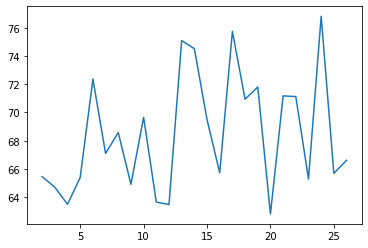

In [ ]:
ds = data.loc[1][2:]
print(type(ds))
plt.plot(ds)